In [ ]:
# title:   Telling stories about WA state marijuana business
# author:  Ed Sarausad         
# date:    11/8/2015
# desc:    Looking at a unique dataset acquired via public record request, 
#          explore the nature of marijuana license applicants    

In [17]:
import pandas as pd
import json
from ggplot import *
# %ggplot inline can't do this!
%matplotlib inline

In [2]:
#read some data
csv_comb_url = "https://www.dropbox.com/s/o6ezbptdmm31xoj/MarijunaApplicantsCombined.csv?dl=1"
mj_biz_df = pd.read_csv(csv_comb_url)


In [3]:
#explore
mj_biz_df.columns


Index([u'Tradename', u'LicenseNo', u'UBI', u'StreetAddress', u'Suite', u'City',
       u'State', u'County', u'ZipCode', u'MailAddress', u'MailSuite',
       u'MailCity', u'MailState', u'MailZipCode', u'PrivDesc',
       u'PrivilegeStatus', u'ReasonAction', u'StatusDate', u'DayPhone',
       u'NightPhone', u'OwnerName', u'Email'],
      dtype='object')

In [4]:
mj_biz_df.describe()

,LicenseNo,UBI,ZipCode,MailZipCode
count,3848.000000,3.848000e+03,3.848000e+03,3.848000e+03
mean,414197.219595,6.029087e+15,9.665543e+08,9.451521e+08
std,14947.984118,1.158027e+14,1.372540e+08,1.933074e+08
min,59974.000000,0.000000e+00,0.000000e+00,9.800100e+04
25%,412902.000000,6.033338e+15,9.824883e+08,9.811308e+08
50%,415688.000000,6.033520e+15,9.857728e+08,9.833891e+08
75%,416610.250000,6.033585e+15,9.885900e+08,9.868296e+08
max,420130.000000,6.035314e+15,9.988000e+08,9.980100e+08


In [5]:
mj_biz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 0 to 3847
Data columns (total 22 columns):
Tradename          3848 non-null object
LicenseNo          3848 non-null int64
UBI                3848 non-null int64
StreetAddress      3848 non-null object
Suite              3848 non-null object
City               3848 non-null object
State              3848 non-null object
County             3845 non-null object
ZipCode            3848 non-null int64
MailAddress        3848 non-null object
MailSuite          3848 non-null object
MailCity           3848 non-null object
MailState          3848 non-null object
MailZipCode        3848 non-null int64
PrivDesc           3848 non-null object
PrivilegeStatus    3848 non-null object
ReasonAction       3848 non-null object
StatusDate         3848 non-null object
DayPhone           3848 non-null object
NightPhone         3848 non-null object
OwnerName          3844 non-null object
Email              3807 non-null object
dtypes: int64(4),

In [6]:
ggplot(aes(x="County"), data=mj_biz_df) + geom_bar() # too many x values!

<ggplot: (279853009)>

In [10]:
ggplot(aes(x="City"), data=mj_biz_df) + geom_bar() # waaaay too many x values!

<ggplot: (268842201)>

In [13]:
# let's look at some top 10's starting with Counties with the most marijuana businesses
top10counties = pd.DataFrame(mj_biz_df[["County"]].stack().value_counts()[:10])
top10counties

,0
KING,487
SPOKANE,387
SNOHOMISH,314
THURSTON,250
WHATCOM,206
PIERCE,201
OKANOGAN,174
GRANT,139
CLARK,127
YAKIMA,117


In [14]:
top10cities = pd.DataFrame(mj_biz_df[["City"]].stack().value_counts()[:10])
top10cities

,0
SEATTLE,268
SPOKANE,138
TACOMA,138
BELLINGHAM,108
OLYMPIA,95
ARLINGTON,92
VANCOUVER,70
SPOKANE VALLEY,70
ELLENSBURG,62
SHELTON,62


In [15]:
top10zips = pd.DataFrame(mj_biz_df[["ZipCode"]].stack().value_counts()[:10])
top10zips

,0
993440000,30
990040000,27
988550000,26
982260000,25
988480000,22
984090000,22
985840000,21
989260000,19
992120000,19
985772917,19


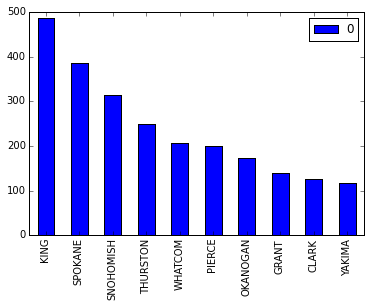

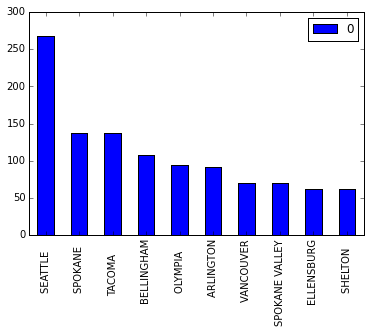

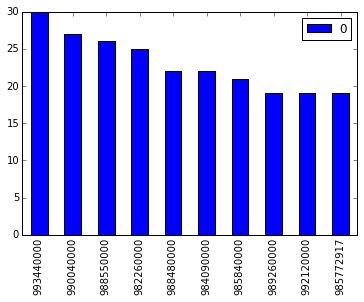

In [18]:
top10counties.plot(kind='bar')
top10cities.plot(kind='bar')
top10zips.plot(kind='bar')

In [19]:
#
#  Can the owner names tell us anything about their gender? Are business owners mostly male or female? 
#
#  Attribution: https://stephenholiday.com/articles/2011/gender-prediction-with-python/ (stephen.holiday@gmail.com)
mj_biz_df[["OwnerName"]].stack().value_counts()[:20]
#
# First we'll look at the most common business owner names looking for kingpins


RODRIGUEZ,  JUAN                     8
TOKELAND GROWING, LLC                6
SPINNING HEADS, INC.                 6
GENSYS ONE CORPORATION               6
THE BUD CLUB, LLC                    6
ALIS GROUP, LLC                      6
NW BAKERY SERVICES, LLC              6
BIDWELL,  ROBIN  LUELL               6
MOMMA CHAN LLC                       6
VERT CORPORATION                     6
HYDRO EMPIRE LLC                     6
CASCADE CROPS, LLC                   6
HARMONY FARMS LLC                    6
THE GREEN GREEN GRASS OF HOME LLC    6
MNS - PNP, LLC                       6
AGAPE RESEARCH WA, LLC               6
CANNASOL FARMS INCORPORATED          6
PATRIOT MEDS LLC                     6
FRENCHMAN COULEE LLC                 6
WOODPEG, INC                         6
dtype: int64

In [20]:
mj_biz_df["mail domain"] = mj_biz_df["Email"].str.split("@")
mj_biz_df["mail domain"]

0                    [admin, 221inc.com]
1             [lottyknowlton, gmail.com]
2       [IAN.OHMCDONALDFARMS, GMAIL.COM]
3       [IAN.OHMCDONALDFARMS, GMAIL.COM]
4            [1212GARDENSLLC, GMAIL.COM]
5            [1212GARDENSLLC, GMAIL.COM]
6               [maxscholder, gmail.com]
7       [bobmccausland2223, comcast.net]
8       [bobmccausland2223, comcast.net]
9              [TLOZANO36277, YAHOO.COM]
10             [troy, i502solutions.com]
11               [jkstraight, gmail.com]
12               [jkstraight, gmail.com]
13           [Sangha.Tanveer, gmail.com]
14           [Sangha.Tanveer, gmail.com]
15           [Sangha.Tanveer, gmail.com]
16           [Sangha.Tanveer, gmail.com]
17             [bjohnson7851, gmail.com]
18             [bjohnson7851, gmail.com]
19           [ASHA.GUNABALAN, GMAIL.COM]
20        [Champagneproducts, gmail.com]
21               [zachstimac, gmail.com]
22               [bart, biochroninc.com]
23               [zachstimac, gmail.com]
24              

In [21]:
#
#  The federal government publishes a list of High-Intensity Drug Trafficking Area (HIDTA). How many of these businesses
#  are located in HIDTA counties?
#
hidta_df = pd.read_csv("https://www.dropbox.com/s/7zhmi5h3ysgfjdx/HIDTA.csv?dl=1")

hidta_df[hidta_df.State=="Washington"]

,State,*HIDTA*,HIDTA Counties,Number of Counties
54,Washington,*Northwest* HIDTA,"Benton, Clark, Cowlitz, Franklin, King, Kitsap...",14
